In [1]:
import os
import tensorflow as tf

/Users/milindkulkarni/python-envs/obj_rec/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [12]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
# By default tf uses all of the virtual ram, this helps us limit the memory usage and prevent memory errors. 
gpu = tf.config.list_physical_devices('GPU')[0]
tf.config.experimental.set_memory_growth(gpu, True)

In [16]:
!pip3 install opencv-python

ERROR: Could not find a version that satisfies the requirement imghdr (from versions: none)
ERROR: No matching distribution found for imghdr
You should consider upgrading via the '/Users/milindkulkarni/python-envs/obj_rec/bin/python3 -m pip install --upgrade pip' command.


In [17]:
import cv2
import imghdr

In [24]:
IMAGE_DIR = 'data'

In [21]:
IMAGE_EXTENSTIONS = ['jpeg', 'jpg', 'bmp', 'png']

In [25]:
for image_dir in os.listdir(IMAGE_DIR):
    for image_name in os.listdir(os.path.join(IMAGE_DIR, image_dir)):
        image_path = os.path.join(IMAGE_DIR, image_dir, image_name)
        # print(image_path)
        try:
            image = cv2.imread(image_path)
            extension = imghdr.what(image_path)
            if extension not in IMAGE_EXTENSTIONS:
                print(f'Unexpected image extension {extension} for image {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with the image: {image_path})

data/happy/images26.jpg
data/happy/images32.jpg
data/happy/e162ccda8ce0f197f8863f327add9233.jpg
data/happy/05-12-21-happy-people.jpg
data/happy/image22.jpeg
data/happy/GettyImages-871518740-1024x707.jpg
data/happy/7-principles-of-successful-and-happy-people.png
data/happy/how-happy-are-healthy-people.jpg
data/happy/physed-happiness-facebookJumbo.jpg
data/happy/170404-happy-workers-feature.jpg
data/happy/images33.jpg
data/happy/images27.jpg
data/happy/image18.jpeg
data/happy/MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg
data/happy/images31.jpg
data/happy/images25.jpg
data/happy/Happy-people-raise-happy-kids-raise-yourself-first.jpg
data/happy/images19.jpg
data/happy/habits-that-define-very-happy-people.jpg
data/happy/goup-happy-people-group-jumping-isolated-white-background-35582232.jpg
data/happy/1902587.jpg
data/happy/o-HAPPY-facebook.jpg
data/happy/07-120104-happy_people_are_not_nice_people.jpg
data/happy/happy-people-13772392.jpg
data/happy/images18.jpg
data/happy/images24

In [29]:
!pip install matplotlib

  Using cached matplotlib-3.9.1-cp39-cp39-macosx_11_0_arm64.whl (7.8 MB)
You should consider upgrading via the '/Users/milindkulkarni/python-envs/obj_rec/bin/python3 -m pip install --upgrade pip' command.


In [30]:
import numpy as np
from matplotlib import pyplot as plt

In [49]:
# keras has a built-in utility for loading and building our image dataset
# this util builds labels, classes, resizing etc for us
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [32]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [33]:
data_iterator = data.as_numpy_iterator()

In [34]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x141708a90>)

In [42]:
batch = data_iterator.next()

In [43]:
batch

(array([[[[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ]],
 
         [[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ]],
 
         [[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ]],
 
         ...,
 
         [[ 

In [44]:
batch[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

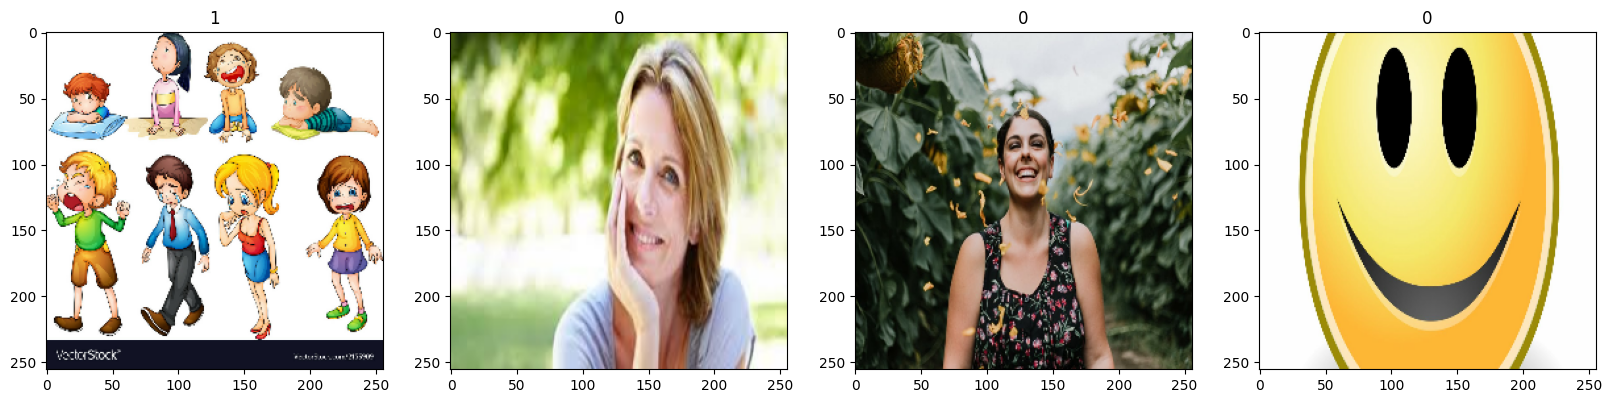

In [46]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [47]:
# to display an image here in the console
# plt.imshow(img)
# opencv reads images in BGR color coding however matplotlib expects RGB
# therefore they look different, to get the same colours convert them from BGR to RGB as follows
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [50]:
scaled_data = data.map(lambda x, y: (x /255, y))